In [1]:
from huggingface_hub import notebook_login

notebook_login()

In [2]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.4 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.


In [4]:
from datasets import load_dataset

dataset = load_dataset("corypaik/coda")

dataset

DatasetDict({
    train: Dataset({
        features: ['class_id', 'display_name', 'ngram', 'label', 'object_group', 'text', 'template_group', 'template_idx'],
        num_rows: 6164
    })
    validation: Dataset({
        features: ['class_id', 'display_name', 'ngram', 'label', 'object_group', 'text', 'template_group', 'template_idx'],
        num_rows: 2060
    })
    test: Dataset({
        features: ['class_id', 'display_name', 'ngram', 'label', 'object_group', 'text', 'template_group', 'template_idx'],
        num_rows: 2133
    })
})

In [5]:
dataset['train'].column_names
df = dataset['train'].to_pandas()
df.head()

,class_id,display_name,ngram,label,object_group,text,template_group,template_idx
0,/m/0hdln,Ruler,ruler,"[0.018181818, 0.036363635, 0.30772728, 0.01818...",2,All rulers are [MASK].,1,0
1,/m/0hdln,Ruler,ruler,"[0.018181818, 0.036363635, 0.30772728, 0.01818...",2,Commonly rulers are [MASK].,1,1
2,/m/0hdln,Ruler,ruler,"[0.018181818, 0.036363635, 0.30772728, 0.01818...",2,Everyone knows that most rulers are [MASK].,1,2
3,/m/0hdln,Ruler,ruler,"[0.018181818, 0.036363635, 0.30772728, 0.01818...",2,Everyone knows that rulers are [MASK].,1,3
4,/m/0hdln,Ruler,ruler,"[0.018181818, 0.036363635, 0.30772728, 0.01818...",2,It is known that most rulers are [MASK].,1,4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6164 entries, 0 to 6163
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   class_id        6164 non-null   object
 1   display_name    6164 non-null   object
 2   ngram           6164 non-null   object
 3   label           6164 non-null   object
 4   object_group    6164 non-null   int64 
 5   text            6164 non-null   object
 6   template_group  6164 non-null   int64 
 7   template_idx    6164 non-null   int32 
dtypes: int32(1), int64(2), object(5)
memory usage: 361.3+ KB


In [7]:
df.describe()

,object_group,template_group,template_idx
count,6164.000000,6164.000000,6164.000000
mean,0.838741,0.503245,9.465607
std,0.757644,0.500030,5.772384
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,4.000000
50%,1.000000,1.000000,9.000000
75%,1.000000,1.000000,14.000000
max,2.000000,1.000000,19.000000


In [8]:
df.isnull().sum()

,0
class_id,0
display_name,0
ngram,0
label,0
object_group,0
text,0
template_group,0
template_idx,0


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  # Import numpy for potential data manipulation

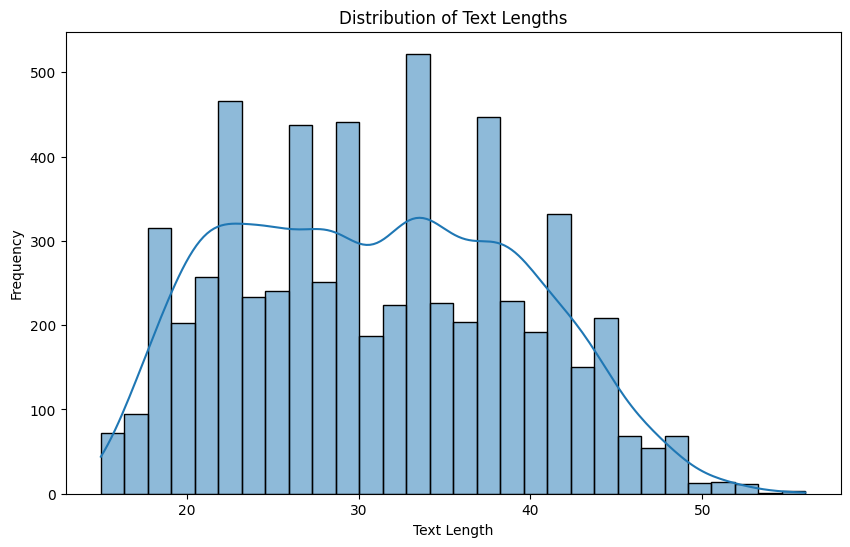

In [17]:
df['text_length'] = df['text'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=30, kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()
